<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Sukumarn_WSN_Pj(13Mar2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.shape
dataset.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
Class             0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event           312106 non-null  int64  
 1   Time            312106 non-null  float64
 2   S_Node          312106 non-null  int64  
 3   Node_id         312106 non-null  int64  
 4   Rest_Energy     312106 non-null  float64
 5   Trace_Level     312106 non-null  int64  
 6   Mac_Type_Pckt   312106 non-null  int64  
 7   Source_IP_Port  312106 non-null  float64
 8   Des_IP_Port     312106 non-null  float64
 9   Packet_Size     312106 non-null  int64  
 10  TTL             312106 non-null  int64  
 11  Hop_Count       312106 non-null  int64  
 12  Broadcast_ID    312106 non-null  int64  
 13  Dest_Node_Num   312106 non-null  int64  
 14  Dest_Seq_Num    312106 non-null  int64  
 15  Src_Node_ID     312106 non-null  int64  
 16  Src_Seq_Num     312106 non-null  int64  
 17  Class     

In [4]:
dataset["Class"].unique()

array([0, 1, 2, 3])

**Data Balancing**

In [5]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 9.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [7]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.00000000e+00 1.00000000e-01 7.90000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963167e-01 7.80000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963500e-01 7.60000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 ...
 [4.00000000e+00 6.57891729e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 7.60000000e+01]
 [4.00000000e+00 6.58574656e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 8.00000000e+01]
 [4.00000000e+00 6.79054956e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 9.00000000e+01]]
[0 0 0 ... 1 1 1]


In [8]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 3: 29844, 1: 11766, 2: 7645})


In [9]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 1: 262851, 2: 262851, 3: 262851})


**Data Preprocessing for Train and Testing**

In [11]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
y_test

array([0, 0, 0, ..., 0, 0, 2])

**Multinomeal Naive Bayes**

In [13]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
y_test_prediction = mnb.predict(X_test)

In [14]:
len(y_test_prediction)

210281

In [15]:
len(y_test)

210281

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='PuBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

In [17]:
# # Creating  a confusion matrix,which compares the y_test and y_pred
# cm = confusion_matrix(y_test, y_pred)
# # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
# cm_df = pd.DataFrame(cm,
#                      index = ['SETOSA','VERSICOLR','VIRGINICA'], 
#                      columns = ['SETOSA','VERSICOLR','VIRGINICA'])
# #Plotting the confusion matrix
# plt.figure(figsize=(5,4))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()

Confusion Matrix of Multinomeal Naive Bayes


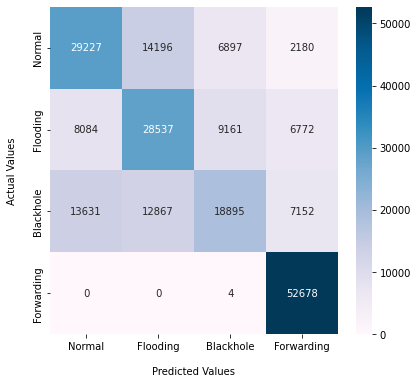

In [ ]:
print("Confusion Matrix of Multinomeal Naive Bayes") 
conf_mat(y_test, y_test_prediction)

In [18]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1) 


In [ ]:
performance("Multinomeal Naive Bayes",y_test, y_test_prediction)

Model Name is : Multinomeal Naive Bayes
Accuracy : 61.621829837217824
Precision : 59.945085899451115
Recall : 61.621829837217824
F1-Score : 0.5993836452186568


**Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10)
lr.fit(X_train, y_train)
y_test_prediction = lr.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix of Logistic Regression


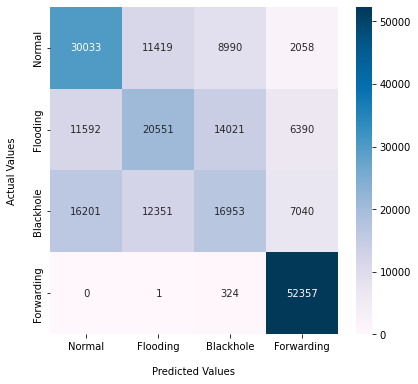

In [ ]:
print("Confusion Matrix of Logistic Regression") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Logistic Regression",y_test, y_test_prediction)

Model Name is : Logistic Regression
Accuracy : 57.01608799653797
Precision : 54.40386419790171
Recall : 57.01608799653797
F1-Score : 0.5508914378295143


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_test_prediction = knn.predict(X_test)

Confusion Matrix of KNN


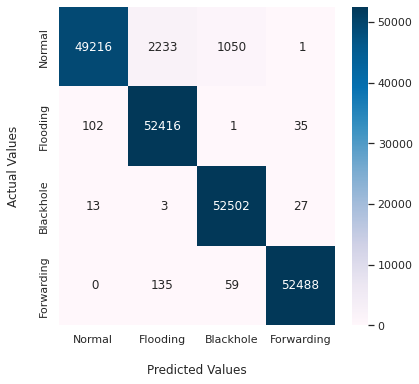

In [ ]:
print("Confusion Matrix of KNN") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("KNN",y_test, y_test_prediction)

Model Name is : KNN
Accuracy : 98.25994740371218
Precision : 98.31282130326777
Recall : 98.25994740371218
F1-Score : 0.9824988608231998


**SVM**

In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)
y_test_prediction = svm.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix of SVM


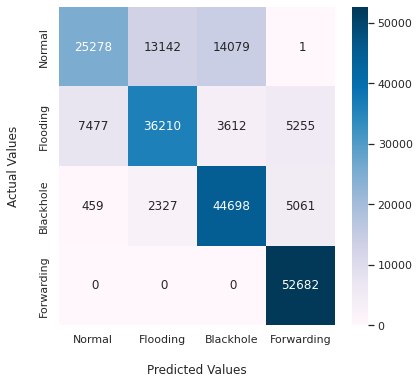

In [ ]:
print("Confusion Matrix of SVM") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("SVM",y_test, y_test_prediction)

Model Name is : SVM
Accuracy : 75.55033502789125
Precision : 75.36529630598787
Recall : 75.55033502789125
F1-Score : 0.7434472828741014


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_test_prediction = clf.predict(X_test)

Confusion Matrix of Decision Tree


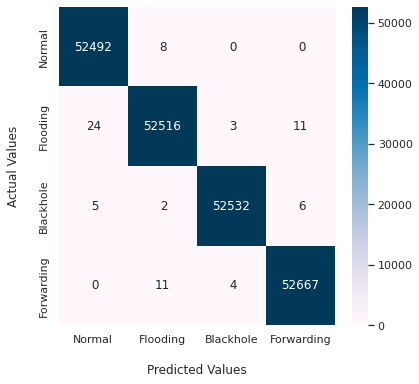

In [ ]:
print("Confusion Matrix of Decision Tree") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Decision Tree",y_test, y_test_prediction)

Model Name is : Decision Tree
Accuracy : 99.96480899367988
Precision : 99.9648112031529
Recall : 99.96480899367988
F1-Score : 0.9996480835640735


**K-means**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_train)
y_test_prediction=kmeans.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Confusion Matrix of K-means


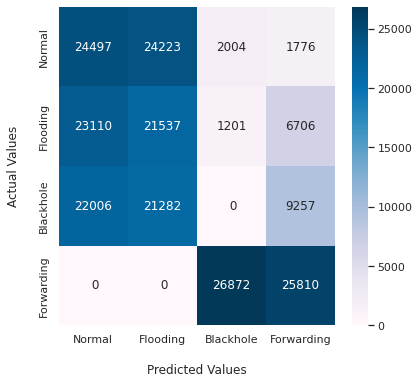

In [ ]:
print("Confusion Matrix of K-means") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("K-means",y_test, y_test_prediction)

Model Name is : K-means
Accuracy : 34.16571159543658
Precision : 31.66262681402855
Recall : 34.16571159543658
F1-Score : 0.32457286636865756


**Begging Method**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)
y_test_prediction = bg.predict(X_test)

Confusion Matrix of Begging


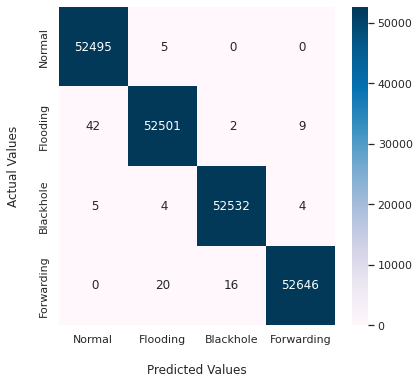

In [ ]:
print("Confusion Matrix of Begging") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Begging",y_test, y_test_prediction)

Model Name is : Begging
Accuracy : 99.94911570707768
Precision : 99.94912538697517
Recall : 99.94911570707768
F1-Score : 0.9994911400461196


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)
y_test_prediction = adb.predict(X_test)

Confusion Matrix of Ada Boost


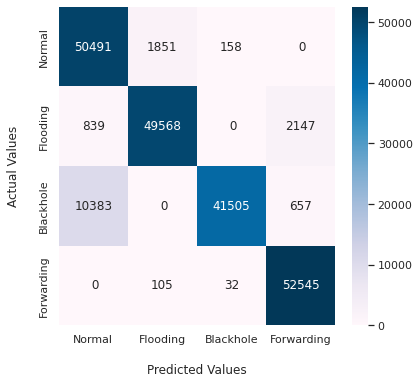

In [ ]:
print("Confusion Matrix of Ada Boost") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Ada Boost",y_test, y_test_prediction)

Model Name is : Ada Boost
Accuracy : 92.3093384566366
Precision : 93.12818327160065
Recall : 92.3093384566366
F1-Score : 0.9226131922174278


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
y_test_prediction = rf.predict(X_test)

Confusion Matrix of Random Forest


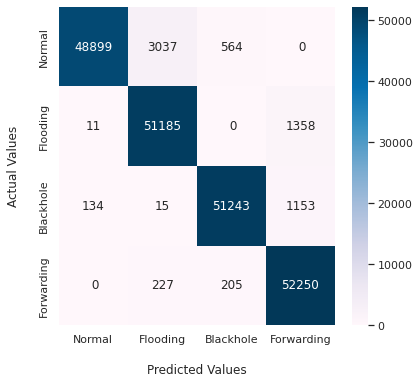

In [ ]:
print("Confusion Matrix of Random Forest") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Random Forest",y_test, y_test_prediction)

Model Name is : Random Forest
Accuracy : 96.81188504905342
Precision : 96.90329760072302
Recall : 96.81188504905342
F1-Score : 0.9681232514268232


**Multi Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(X_train, y_train)
y_test_prediction = evc.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix of Voting


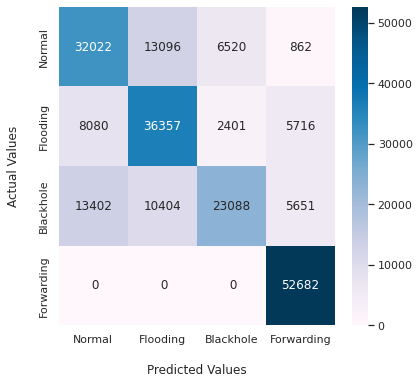

In [ ]:
print("Confusion Matrix of Voting") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Voting",y_test, y_test_prediction)

Model Name is : Voting
Accuracy : 68.5506536491647
Precision : 68.47967319327624
Recall : 68.5506536491647
F1-Score : 0.6734444002152306


## **Deep learning**

In [20]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# # load the data from the Excel file
# data = pd.read_excel('data.xlsx')

# # Pre-process the data 
# data_x = data.iloc[:, :-1].values
# data_y = data.iloc[:, -1].values

# # split the data into train and test sets 
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

# Build the deep learning model 
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile and train the model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64)

# Evaluate the model on the test set 
score = model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model 
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/5
13143/13143 [==============================] - 27s 2ms/step - loss: 0.9314 - accuracy: 0.7157
Epoch 2/5
13143/13143 [==============================] - 26s 2ms/step - loss: 0.3498 - accuracy: 0.8613
Epoch 3/5
13143/13143 [==============================] - 26s 2ms/step - loss: 0.2378 - accuracy: 0.9072
Epoch 4/5
13143/13143 [==============================] - 26s 2ms/step - loss: 0.1956 - accuracy: 0.9271
Epoch 5/5
3286/3286 [==============================] - 6s 2ms/step - loss: 0.1346 - accuracy: 0.9475
Test Loss: 0.13457413017749786
Test Accuracy: 0.9475273489952087
6572/6572 [==============================] - 10s 1ms/step
Confusion Matrix:
[[45218  5750  1532     0]
 [   62 52177     3   312]
 [   19    15 52511     0]
 [    0  2638   703 49341]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     52500
           1       0.86      0.99      0.92     52554
           2       0.96      1.00      0.98    

Confusion Matrix of Deep Neural Network


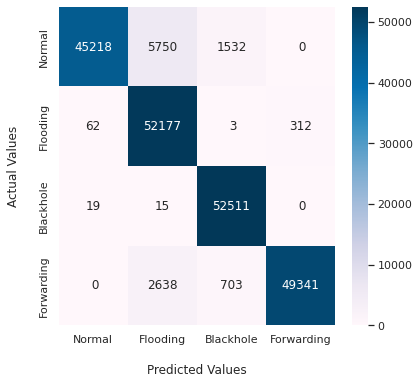

In [22]:
print("Confusion Matrix of Deep Neural Network") 
conf_mat(y_test, predicted_classes)

**Multi-Layer Perceptron (MLP)**

In [23]:
from keras.models import Sequential
from keras.layers import Dense

# Define the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set 
score = model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model 
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/5
26286/26286 [==============================] - 64s 2ms/step - loss: 0.5870 - accuracy: 0.7995 - val_loss: 0.2659 - val_accuracy: 0.8965
Epoch 2/5
26286/26286 [==============================] - 64s 2ms/step - loss: 0.2123 - accuracy: 0.9193 - val_loss: 0.2207 - val_accuracy: 0.9132
Epoch 3/5
26286/26286 [==============================] - 63s 2ms/step - loss: 0.1614 - accuracy: 0.9416 - val_loss: 0.1228 - val_accuracy: 0.9564
Epoch 4/5
26286/26286 [==============================] - 64s 2ms/step - loss: 0.1480 - accuracy: 0.9480 - val_loss: 0.1072 - val_accuracy: 0.9619
Epoch 5/5
3286/3286 [==============================] - 6s 2ms/step - loss: 0.2217 - accuracy: 0.9284
Test Loss: 0.22168207168579102
Test Accuracy: 0.9284005761146545
6572/6572 [==============================] - 10s 2ms/step
Confusion Matrix:
[[46390  4117  1991     2]
 [ 5151 45996     3  1404]
 [  189     7 52261    88]
 [    0   788  1316 50578]]
Classification Report:
              precision    recall  f1-scor

Confusion Matrix of Multi-Layer Perceptron (MLP)


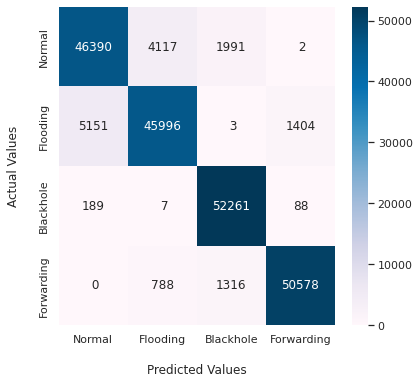

In [27]:
print("Confusion Matrix of Multi-Layer Perceptron (MLP)") 
conf_mat(y_test, predicted_classes)

### **Recurrent Network (RNN)**

In [53]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
dataset = pd.read_csv("dataset.csv")

# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'], axis=1)
X = X.values

# One-hot encode y
y = to_categorical(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
score = model.evaluate(X_test, y_test, batch_size=32)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("Classification Report:")
print(classification_report(y_true, y_pred))


Epoch 1/5
7803/7803 [==============================] - 44s 5ms/step - loss: 0.3949 - accuracy: 0.9201 - val_loss: 0.2339 - val_accuracy: 0.9382
Epoch 2/5
7803/7803 [==============================] - 29s 4ms/step - loss: 0.2627 - accuracy: 0.9277 - val_loss: 0.2236 - val_accuracy: 0.9383
Epoch 3/5
7803/7803 [==============================] - 30s 4ms/step - loss: 0.2600 - accuracy: 0.9260 - val_loss: 0.2323 - val_accuracy: 0.9383
Epoch 4/5
7803/7803 [==============================] - 31s 4ms/step - loss: 0.2767 - accuracy: 0.9172 - val_loss: 0.2236 - val_accuracy: 0.9383
Epoch 5/5
1951/1951 [==============================] - 4s 2ms/step - loss: 0.2164 - accuracy: 0.9383
Test Loss: 0.21644152700901031
Test Accuracy: 0.9383390545845032
1951/1951 [==============================] - 4s 2ms/step
Confusion Matrix:
[[52587     0     0     0]
 [ 2096     2     0   231]
 [ 1383     0     0   138]
 [    1     0     0  5984]]
Classification Report:
              precision    recall  f1-score   suppo

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix of Recurrent Network (RNN)


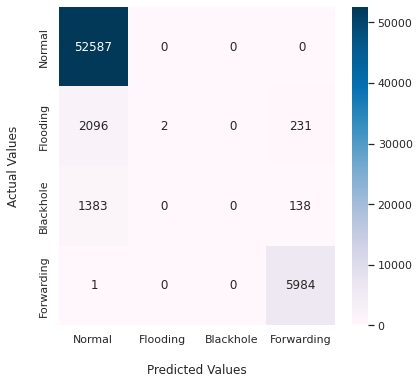

In [56]:
print("Confusion Matrix of Recurrent Network (RNN)") 
conf_mat(y_true, y_pred)